https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

Задача апроксимации (наиболее точного приближения) функции 
$ y = \sin(x) $ 
с использованием многочлена третьей степени 
$ \hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 = \langle(1, x, x^2, x^3)\,,\mathbf{\theta}\rangle  $, где $\theta = (\theta_0, \theta_1, \theta_2, \theta_3)^\mathrm{T} $
при имееющимся массиве  данных вида $\{x_i,y_i=\sin(x_i)\}_{i=1,n} $ может быть формализована следующим образом:<br>
нахождение таких параметров $\theta$ , которые минимизирровали бы  
$$loss = J(\theta) = \displaystyle\sum_{i=1}^{n} [ y_i-\hat{y}(x_i,\theta) ]^2 $$ 

### Градиентный спуск. numpy

![title](img/grad.png)

$$ \nabla_\theta{J} = ( \frac{dJ}{d\theta_0}, \frac{dJ}{d\theta_1}, \frac{dJ}{d\theta_2}, \frac{dJ}{d\theta_3})  $$
$ J( \theta ) = ( {f \circ \hat{y}} )(\theta ) $ , где $ f(\hat{y}| y_i) = (y_i-\hat{y})^2 $ , тогда

$$\frac{{dJ}}{{d\theta_j}} = \frac{{df}}{{d\hat{y}}}\,\,\frac{{d\hat{y}}}{{d\theta_j}}$$

In [1]:
import numpy as np
import math
import torch
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Результат: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 4119.655698251082
199 2808.1295162306537
299 1917.1973418368627
399 1311.3068217773407
499 898.8002887265128
599 617.6365575090938
699 425.7771432627834
799 294.7067130524324
899 205.06184286387233
999 143.67922091734525
1099 101.60038428139475
1199 72.72164740764592
1299 52.87963989412208
1399 39.23124279871704
1499 29.832690972445583
1599 23.353554811189596
1699 18.88216199008859
1799 15.793076791897963
1899 13.656742245036426
1999 12.17780010520298
Результат: y = -0.05236057155133672 + 0.8861233439382495 x + 0.009033069876277028 x^2 + -0.09750979392350036 x^3


x=[-3.14159265 -3.13844949 -3.13530633], y=[-1.22464680e-16 -3.14315906e-03 -6.28628707e-03]


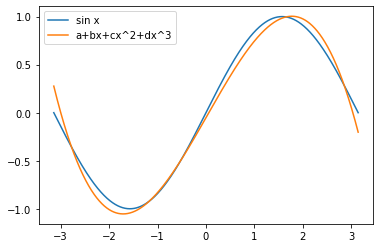

In [11]:
import matplotlib.pyplot as plt

first_x = x[:3]
first_y = y[:3]
print(f'x={first_x}, y={first_y}')

y_pred = a + b * x + c * x ** 2 + d * x ** 3


plt.plot(x, y)
plt.plot(x, y_pred)

plt.legend(['sin x', 'a+bx+cx^2+dx^3'], loc='upper left')

plt.show()

Pytorch.Tensors

In [12]:
%%time

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Результат: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 295.0220947265625
199 199.9832305908203
299 136.58316040039062
399 94.2630615234375
499 65.99813079833984
599 47.10917282104492
699 34.47808074951172
799 26.026317596435547
899 20.367149353027344
999 16.575233459472656
1099 14.032588005065918
1199 12.32625961303711
1299 11.18030071258545
1399 10.410050392150879
1499 9.891850471496582
1599 9.542951583862305
1699 9.30781364440918
1799 9.149189949035645
1899 9.042085647583008
1999 8.969694137573242
Результат: y = 0.008056571707129478 + 0.8472863435745239 x + -0.001389891724102199 x^2 + -0.09198556840419769 x^3
CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 168 ms


Использование механизма Autograd

In [8]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1485.810546875
199 986.33203125
299 655.8031616210938
399 437.06439208984375
499 292.2982177734375
599 196.48309326171875
699 133.06280517578125
799 91.08173370361328
899 63.29049301147461
999 44.89137649536133
1099 32.70921325683594
1199 24.642742156982422
1299 19.30086898803711
1399 15.762998580932617
1499 13.419648170471191
1599 11.867323875427246
1699 10.838851928710938
1799 10.157390594482422
1899 9.70577335357666
1999 9.406445503234863
Result: y = -0.005373313091695309 + 0.833665132522583 x + 0.0009269859292544425 x^2 + -0.09004807472229004 x^3


Определение собственной autograd функции

In [8]:
import torch
import math


class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918998718262
1299 10.71425724029541
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003360748291016
1999 8.943639755249023
Result: y = -5.650519163680201e-09 + -2.208526849746704 * P3(1.3525994768670557e-09 + 0.2554861009120941 x)


Pytorch. Модуль nn

In [2]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 614.2096557617188
199 415.857666015625
299 282.7313537597656
399 193.310546875
499 133.1963653564453
599 92.7494125366211
699 65.51070404052734
799 47.15031433105469
899 34.762542724609375
999 26.39652442932129
1099 20.740737915039062
1199 16.913358688354492
1299 14.320660591125488
1399 12.56240463256836
1499 11.368756294250488
1599 10.557516098022461
1699 10.005560874938965
1799 9.629587173461914
1899 9.373201370239258
1999 9.198173522949219
Result: y = -0.015084893442690372 + 0.8437750339508057 x + 0.0026023946702480316 x^2 + -0.0914861187338829 x^3


Optim

In [21]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 8252.5185546875
199 2549.163330078125
299 1089.519287109375
399 853.915771484375
499 775.2987670898438
599 679.814697265625
699 567.7554321289062
799 452.384765625
899 345.1627502441406
999 252.11180114746094
1099 175.29478454589844
1199 114.83309936523438
1299 69.95346069335938
1399 39.34419250488281
1499 21.05677032470703
1599 12.248531341552734
1699 9.356672286987305
1799 8.897991180419922
1899 8.934645652770996
1999 8.919450759887695
Result: y = 0.0002537700638640672 + 0.8571107387542725 x + 0.0002537636028137058 x^2 + -0.09279326349496841 x^3


Создание своего nn модуля

In [29]:
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 5000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 2937.052490234375
199 1062.6932373046875
299 393.862060546875
399 155.00857543945312
499 69.62786102294922
599 39.073883056640625
699 28.12575340270996
799 24.196914672851562
899 22.7845516204834
999 22.275772094726562
1099 22.092073440551758
1199 22.025577545166016
1299 22.001428604125977
1399 21.992626190185547
1499 21.98940658569336
1599 21.98822593688965
1699 21.98778533935547
1799 21.987625122070312
1899 21.987565994262695
1999 21.9875431060791
Result: y = -5.054097709944472e-05 + 0.8568307161331177 x + 8.728889042686205e-06 x^2 + -0.09335684776306152 x^3


Управление потоком исполнения

In [ ]:
# -*- coding: utf-8 -*-
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')